# Time-series Stock Data

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import quandl
%matplotlib inline
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

## Get Historical Data from Quandl

### Fetch Data for All Stocks on a Single Dataframe

In [2]:
# add quandl API key for unrestricted
quandl.ApiConfig.api_key = 'ZNB9kQtgKML6KWfbbMNN'

# get the table for daily stock prices and,
# filter the table for selected tickers, columns within a time range
# set paginate to True because Quandl limits tables API to 10,000 rows per call
data = quandl.get_table('WIKI/PRICES', ticker = ['AMZN','AAPL', 'MSFT', 'GOOGL','GE',
                                                 'IBM', 'BA','AAL','DAL','UAL', 'PEP','KO'],
                        qopts = { 'columns': ['ticker', 'date', 'Open','High','Low','Close', 'Volume','adj_close']},
                        date = { 'gte': '2001-12-31', 'lte': '2018-3-31' },paginate=True)

In [3]:
data.tail()

      ticker       date   open    ...      close     volume  adj_close
None                              ...                                 
45057    AAL 2005-10-03  20.90    ...      21.50  2.836e+06     55.864
45058    AAL 2005-09-30  20.26    ...      21.01  8.373e+06     54.591
45059    AAL 2005-09-29  20.40    ...      20.21  2.891e+06     52.512
45060    AAL 2005-09-28  19.30    ...      20.50  1.541e+07     53.266
45061    AAL 2005-09-27  21.05    ...      19.30  2.577e+06     50.148

[5 rows x 8 columns]

In [4]:
# create a new dataframe with 'date' column as index
data = data.set_index('date')

In [5]:
data[:5]

           ticker   open    high    ...      close     volume  adj_close
date                                ...                                 
2018-03-27    UAL  68.72  69.910    ...      68.18  3.299e+06      68.18
2018-03-26    UAL  68.39  68.680    ...      68.48  2.690e+06      68.48
2018-03-23    UAL  68.75  68.980    ...      67.39  2.620e+06      67.39
2018-03-22    UAL  69.46  70.490    ...      68.45  3.362e+06      68.45
2018-03-21    UAL  69.12  70.635    ...      69.94  2.614e+06      69.94

[5 rows x 7 columns]

### Fetching index data SP500

In [6]:
# add quandl API key for unrestricted
quandl.ApiConfig.api_key = 'ZNB9kQtgKML6KWfbbMNN'

# get the table for daily stock prices and,
# filter the table for selected tickers, columns within a time range
# set paginate to True because Quandl limits tables API to 10,000 rows per call
sp_500 = quandl.get_table('WIKI/PRICES', ticker = ['SNP'],
                        qopts = { 'columns': ['date', 'ticker', 'Open','High','Low','Close', 'Volume','adj_close']},
                        date = { 'gte': '2012-12-31', 'lte': '2018-3-31' },paginate=True)

SP500 data was not available to download, downloaded via Yahoo Finance SP500 as csv

In [7]:
sp_500 = pd.read_csv('./data/sp_500.csv')

In [8]:
sp_500[:5]

         Date     Open     High     ...        Close  Adj Close      Volume
0  2001-12-31  1161.02  1161.16     ...      1148.08    1148.08   943600000
1  2002-01-02  1148.08  1154.67     ...      1154.67    1154.67  1171000000
2  2002-01-03  1154.67  1165.27     ...      1165.27    1165.27  1398900000
3  2002-01-04  1165.27  1176.55     ...      1172.51    1172.51  1513000000
4  2002-01-07  1172.51  1176.97     ...      1164.89    1164.89  1308300000

[5 rows x 7 columns]

## Visualizing financial time-series data

### Plotting closing prices

In [9]:
# reset the index to make everything columns
just_closing_prices = data[['ticker','adj_close']].reset_index()
just_closing_prices[:5]

        date ticker  adj_close
0 2018-03-27    UAL      68.18
1 2018-03-26    UAL      68.48
2 2018-03-23    UAL      67.39
3 2018-03-22    UAL      68.45
4 2018-03-21    UAL      69.94

Create a Pivot of Adj Close Prices

In [10]:
daily_close_px = just_closing_prices.pivot('date', 'ticker','adj_close')

In [11]:
daily_close_px[:5]

ticker      AAL   AAPL   AMZN ...     MSFT     PEP  UAL
date                          ...                      
2001-12-31  NaN  1.407  10.82 ...   22.051  33.129  NaN
2002-01-02  NaN  1.497  10.96 ...   22.314  33.442  NaN
2002-01-03  NaN  1.515  11.90 ...   23.043  33.197  NaN
2002-01-04  NaN  1.522  12.25 ...   22.933  32.904  NaN
2002-01-07  NaN  1.471  12.34 ...   22.820  32.714  NaN

[5 rows x 12 columns]

Plot Apple Stock prices to check the plotting

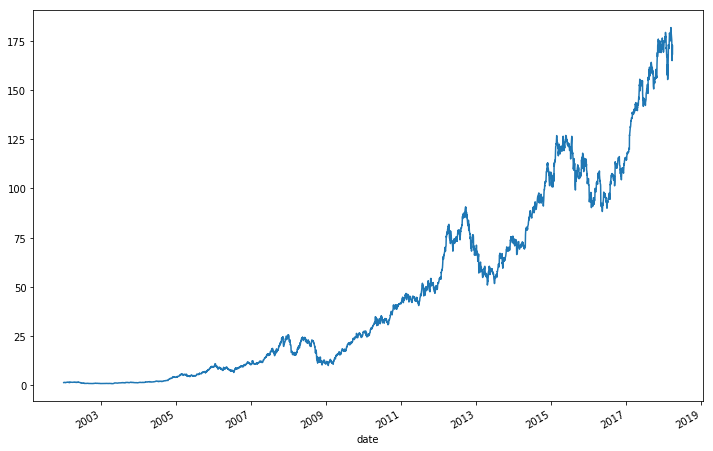

In [12]:
_ =daily_close_px['AAPL'].plot(figsize=(12,8));

Plot All Stock Prices against each other

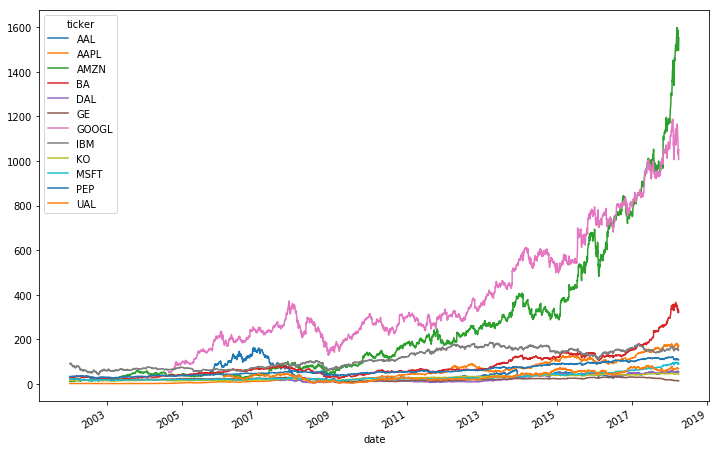

In [13]:
_ = daily_close_px.plot(figsize=(12,8));

### Calculating simple daily percentage change

The simple daily percentage change (without dividends and other factors) is the amount of percentage change in the value of a stock over a single day of trading.

First test AAPL percentage change between 2001-12-31 - 2002-01-02

In [14]:
AAPL_p_t0 = daily_close_px.iloc[0]['AAPL'] #Pt-1
AAPL_p_t1 = daily_close_px.iloc[1]['AAPL'] #Pt
r_t1 = AAPL_p_t1 / AAPL_p_t0 - 1 # returns

In [15]:
AAPL_p_t0, AAPL_p_t1, r_t1

(1.4072276172736, 1.497187373629, 0.06392694063927662)

Apple moved from 1.41 to 1.497 and the percentage change of 6.4%

Probably the easiest way to do this is with the built-in .pct_change() method of a pandas Series or DataFrame, instead of going the hard way.

In [16]:
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.fillna(0, inplace=True)
daily_pct_change.iloc[:5,:8]

ticker      AAL   AAPL   AMZN  ...       GE  GOOGL    IBM
date                           ...                       
2001-12-31  0.0  0.000  0.000  ...    0.000    0.0  0.000
2002-01-02  0.0  0.064  0.013  ...    0.022    0.0  0.004
2002-01-03  0.0  0.012  0.086  ...   -0.008    0.0  0.018
2002-01-04  0.0  0.005  0.029  ...    0.008    0.0  0.016
2002-01-07  0.0 -0.033  0.007  ...   -0.039    0.0 -0.012

[5 rows x 8 columns]

### Calculating simple daily cumulative returns

The cumulative daily rate of return is useful to determine the value of an investment at regular intervals after investment. This is calculated from the daily percentage change values by multiplying (1 + the current day's percentage change) with the cumulative product of all of the previous values.

In [17]:
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return.iloc[:,:8][:8]

ticker      AAL   AAPL   AMZN  ...       GE  GOOGL    IBM
date                           ...                       
2001-12-31  1.0  1.000  1.000  ...    1.000    1.0  1.000
2002-01-02  1.0  1.064  1.013  ...    1.022    1.0  1.004
2002-01-03  1.0  1.077  1.100  ...    1.013    1.0  1.022
2002-01-04  1.0  1.082  1.132  ...    1.022    1.0  1.038
2002-01-07  1.0  1.046  1.140  ...    0.982    1.0  1.026
2002-01-08  1.0  1.032  1.095  ...    0.972    1.0  1.031
2002-01-09  1.0  0.989  1.066  ...    0.962    1.0  1.029
2002-01-10  1.0  0.969  1.020  ...    0.963    1.0  1.010

[8 rows x 8 columns]

We can plot the cumulative returns to see how the different stocks compare. This gives a nice view of how the stocks will change your investment over time and how they perform relative to each other.

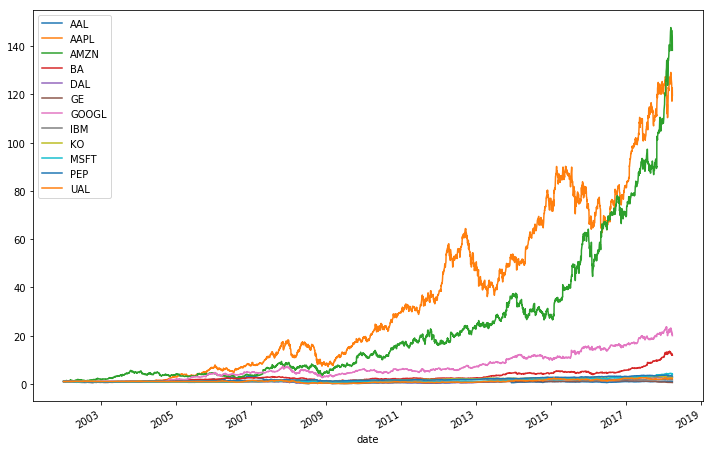

In [30]:
cum_daily_return.plot(figsize=(12,8))
plt.legend(loc=2);

### Use 2 different Scale against Apple, Amazon and Google Stocks, to Visualise the comparison price scale difference.

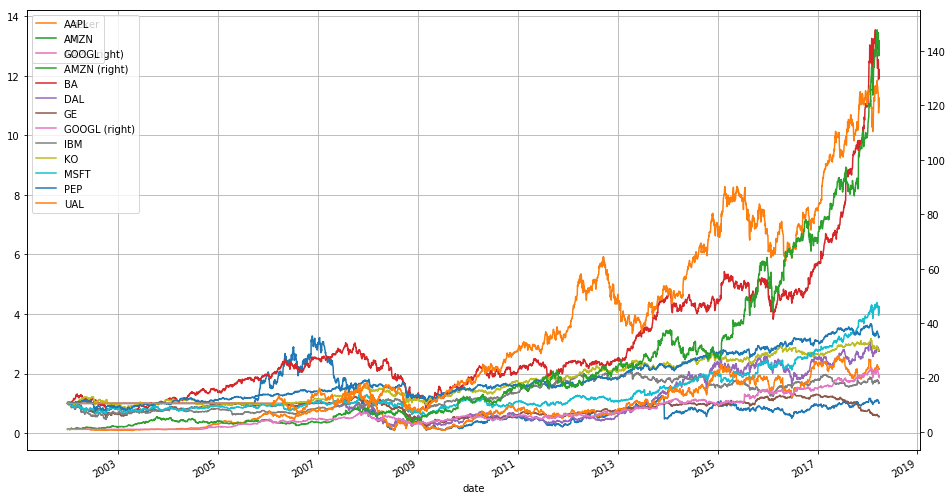

In [34]:
cum_daily_return.plot(secondary_y = ["AAPL", "AMZN",'GOOGL'], figsize=(16,9), grid = True)
plt.legend(loc=2);

### Analyzing the distribution of returns

Distribution of the daily returns for AAPL

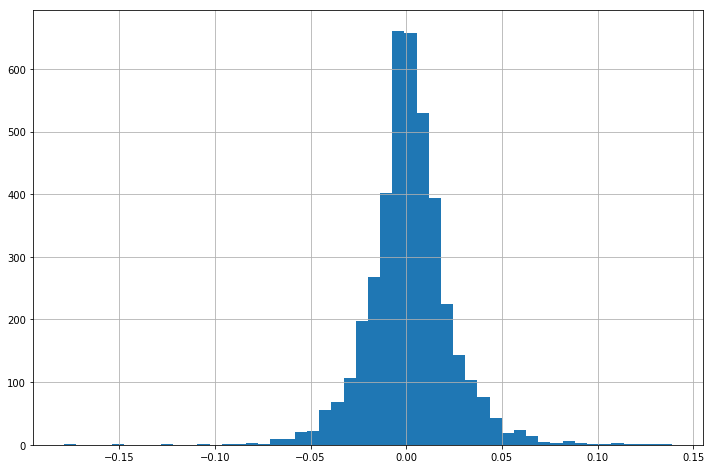

In [19]:
aapl = daily_pct_change['AAPL']
aapl.hist(bins=50, figsize=(12,8));

This chart tells us several things. First, most of the daily changes center around 0.0, and there is a small amount of skew to the left, but the data appears fairly symmetrical and normally distributed.

In [20]:
aapl.describe()

count    4.087e+03
mean     1.411e-03
std      2.193e-02
min     -1.792e-01
25%     -9.319e-03
50%      9.012e-04
75%      1.230e-02
max      1.390e-01
Name: AAPL, dtype: float64

In [21]:
aapl.describe(percentiles=[0.025, 0.5, 0.975])

count    4.087e+03
mean     1.411e-03
std      2.193e-02
min     -1.792e-01
2.5%    -4.216e-02
50%      9.012e-04
97.5%    4.746e-02
max      1.390e-01
Name: AAPL, dtype: float64

Compare the return distributions of all stock using histograms,

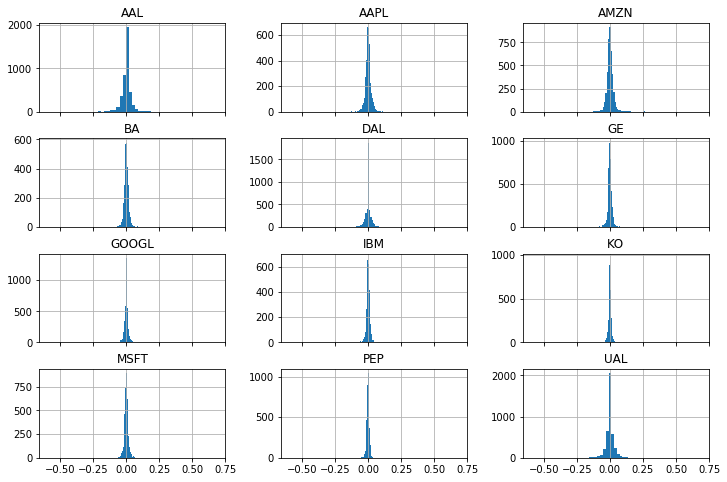

In [22]:
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8));

### Q-Q plots
Q-Q plot of the returns of a stock compared to a normal distribution to get a feel of how close our returns are to a normal distribution.

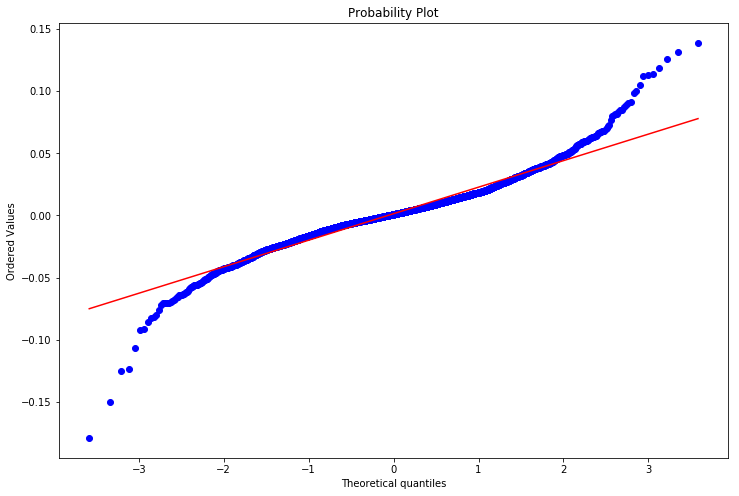

In [23]:
import scipy.stats as stats
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
stats.probplot(aapl, dist='norm', plot=ax)
plt.show();

A distribution of data in a Q-Q plot would show perfect correspondence to a normal distribution if all of the blue dots fell exactly along the red line and the slope of the red line would be 1.0 (representing perfect correlation and an R^2 value of 1.0).  Our returns are correlated at a level of 0.9295, which is representative of a very high degree of correlation.  

Between quantiles -2 and +2, most of our data is very close to being perfectly correlated. This range is also very close to our 95 percent confidence interval (justslightly wider, which actually means higher confidence). It is outside this range that we begin to see differences in the levels of correlation of the distribution with what appears to be a similar amount of skew along both tails but perhaps with a little more towards the negative.

### Box-and-whisker plots
A box plot is a convenient way to graphically depict groups of data through their quartiles. The box portion of the plot represents the range from the low quantile to the high quantile, and the box is split by a line that represents the median value. 

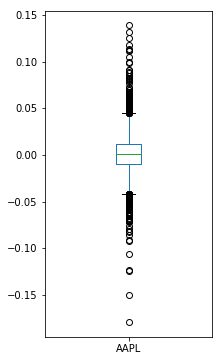

In [24]:
daily_pct_change[['AAPL']].plot(kind='box', figsize=(3,6));

Compare all the Stocks and align them against each other to compare the distributions of multiple datasets.

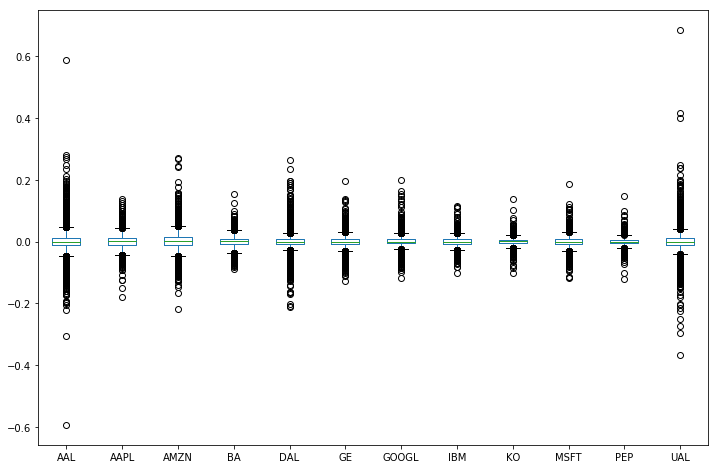

In [25]:
daily_pct_change.plot(kind='box', figsize=(12,8));

This plot gives us a very good comparison of the performance of these stocks over this period of time. The wider the box, the higher the variability and the risk. The closer the median line to either side of the box or the longer a whisker is than the other, the greater the skew in the distribution.

### Comparison of daily percentage change between stocks

A scatter plot is also a very effective means of being able to visually determine the relationship between the rate of percentage change in prices between two stocks. 

In [26]:
def render_scatter_plot(data, x_stock_name,
                        y_stock_name, xlim=None, ylim=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name], data[y_stock_name])
    if xlim is not None: ax.set_xlim(xlim)
    ax.autoscale(False)
    ax.vlines(0, -10, 10)
    ax.hlines(0, -10, 10)
    ax.plot((-10, 10), (-10, 10))
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)
                        

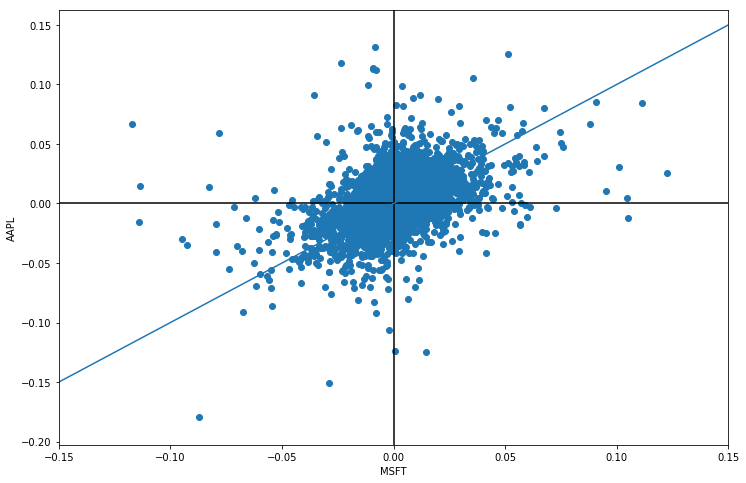

In [27]:
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'MSFT', 'AAPL', xlim=limits)

In this plot, excluding several outliers, this cluster appears to demonstrate a small amount of correlation between the two stocks as the linear correlation would seem to be closer to horizontal (slope = 0, that is, no correlation) than a perfect diagonal. 

This can be compared to the relationship between DAL and UAL, which shows very high correlation

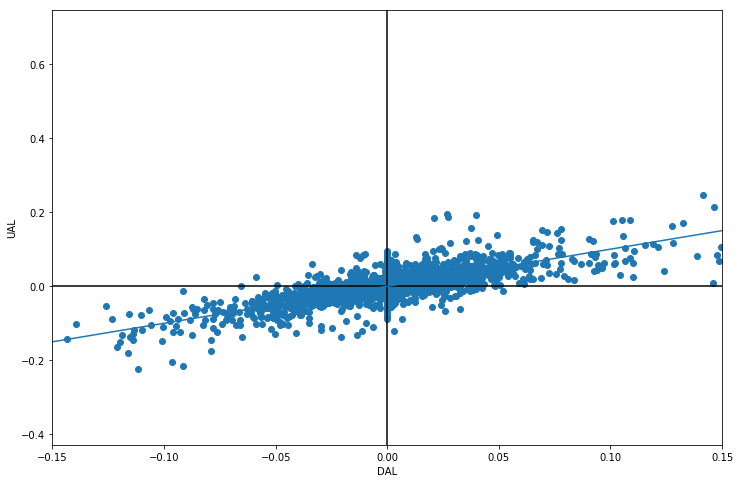

In [28]:
render_scatter_plot(daily_pct_change, 'DAL', 'UAL', xlim=limits)

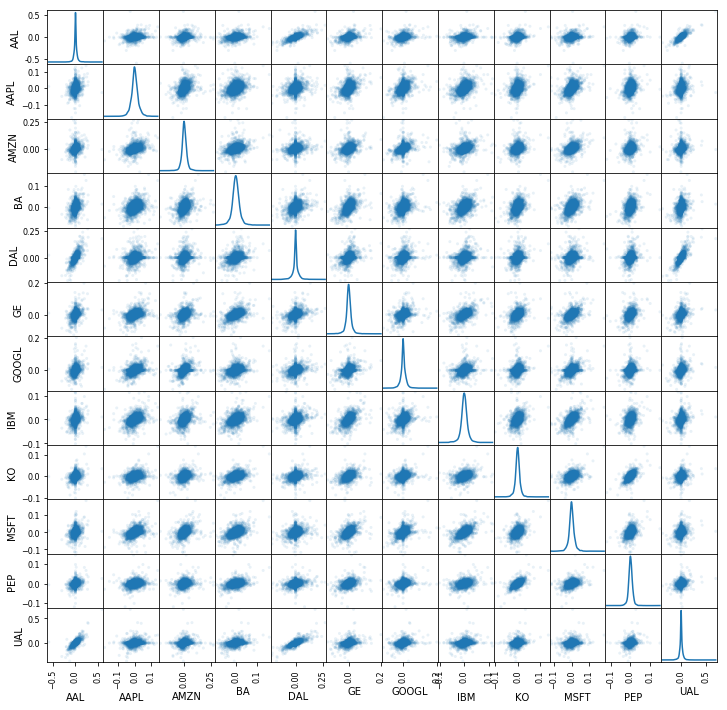

In [29]:
# all stocks against each other, with a KDE in the diagonal
_ = pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,
                   figsize=(12,12));   